# [E-03]카메라 스티커앱 만들기

## 첫 시도 - 일단 한번 만들어보자!!


## library import

- **opencv** : 오픈소스 컴퓨터 비전 및 머신러닝 라이브러리  
    (얼굴 인식, 객체의 3D모델 추출, 좌표 생성, 이미지 스티칭 영상 검색 등 다양한 응용 분야에 이용) 
    
    
- **dlib** : 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

>***opencv 와 dlib 는 듣기엔 같은 기능 같으나 얼굴인식에 관한 dlib 가 강력한 기능을 보이고 있으며 (99% 이상이라 한다..)  
dlib 의 기능을 사용하기 위한 이미지 처리에 대해서는 opencv 가 많은 역할을 한다.***


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


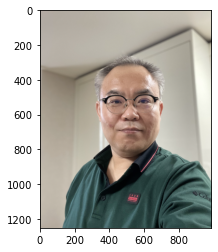

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/psd.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()              # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # opencv BGR -> RGB 이미지로 바꾸는 것
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출 (face detection)

`detector_hog`의 두 번째 파라미터는 ***이미지 피라미드의 수***이다. 이미지 피라미드는 upsampling 방법을 통해 크기를 키우는 것으로 이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능하다.


rectangles[[(332, 418) (718, 804)]]


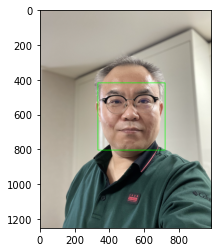

In [3]:
detector_hog = dlib.get_frontal_face_detector()  # detector를 선언
dlib_rects = detector_hog(img_rgb, 1)   # (image, 이미지 피라미드의 수)

print(dlib_rects)   # 찾은 얼굴 영역 박스 리스트(여러 얼굴이 있을 수 있다)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- dlib detector는 `dlib.rectangles 타입의 객체`를 반환  
- dlib.rectangle 객체는 `left(), top(), right(), bottom(), height(), width()` 등의 함수를 포함

## 얼굴 랜드마크 (face landmark)

face landmark는 detection의 결과물인 bounding box로 잘라낸(crop) 얼굴 이미지를 이용한다.

- 객체 내부의 점을 찾는 기술 **object keypoint estimation** 알고리즘 2가지 중 아래 방식 선택
    - top-down : bounding box를 찾고 box 내부의 keypoint를 예측

In [4]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))
print(list_landmarks[0])


68
[(340, 563), (341, 604), (345, 648), (354, 691), (372, 731), (399, 765), (436, 792), (479, 810), (526, 815), (574, 810), (615, 791), (649, 760), (671, 718), (683, 673), (691, 631), (691, 586), (689, 544), (371, 498), (390, 473), (422, 463), (455, 468), (488, 476), (537, 471), (571, 463), (606, 460), (639, 473), (658, 503), (514, 519), (516, 546), (517, 571), (519, 598), (480, 634), (500, 636), (520, 637), (539, 635), (557, 633), (411, 532), (427, 522), (447, 522), (466, 535), (447, 536), (426, 536), (565, 532), (584, 520), (604, 519), (622, 528), (605, 534), (585, 535), (451, 694), (478, 683), (503, 675), (520, 679), (537, 674), (561, 682), (590, 694), (564, 705), (542, 709), (524, 710), (506, 709), (481, 705), (461, 694), (503, 688), (520, 690), (538, 688), (581, 694), (540, 692), (523, 693), (505, 692)]


- list_points 는 tuple (x, y) 68개로 이루어진 리스트
- 이미지에서 찾아진 얼굴 개수마다 반복하면 list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장된다.  
  (아래 그림 Dlib에 사용 되는 랜드마크 순서 참조)  



## landmark 이미지에 출력

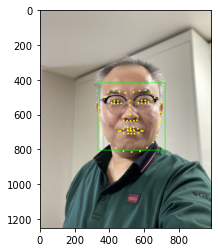

In [5]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)  # point가 명확하게 보이도록 5로 변경

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()    
    

- 아래 그림은 Dlib에 사용 되는 랜드마크 순서
- 점의 갯수는 데이터셋과 논문마다 다름(ibug 300w 데이터셋은 68개를 사용)
    - Dlib은 ibug 300-W 데이터셋으로 학습한 pretrained model 을 제공하고 학습 알고리즘은 regression tree의 앙상블 모델을 사용
- 여기서는 Dlib에서 제공되는 모델을 사용하였다.

[Dlib에 사용 되는 랜드마크 순서]
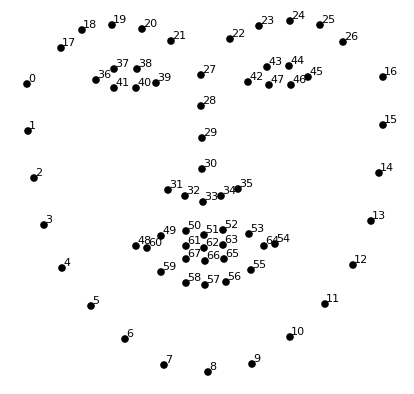

## 스티커 적용  

### 얼굴 위치는 카메라의 거리에 따라 픽셀 x가 다르기에 비율로 아래 방법으로 계산한다.
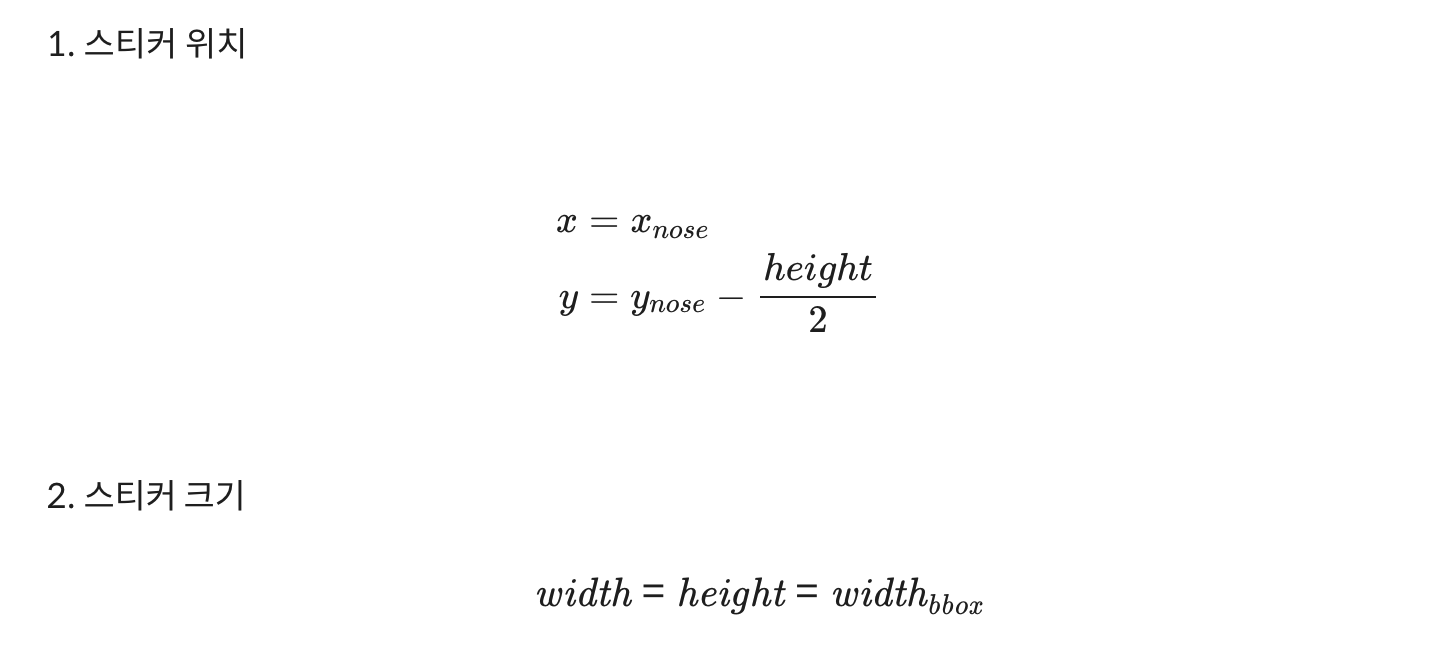


- ### 고양이 스티커 

In [6]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) 
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(519, 598)
(x,y) : (519,405)
(w,h) : (387,387)


- ### 카우보이 모자 스티커 

In [7]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[27]) 
    x1 = landmark[27][0]
    y1 = landmark[27][1] - dlib_rect.height()//2
    w1 = h1 = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x1,y1))
    print ('(w,h) : (%d,%d)'%(w1,h1))

(514, 519)
(x,y) : (514,326)
(w,h) : (387,387)


- ### t-shirt 스티커 

In [8]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[27]) 
    x2 = landmark[27][0]
    y2 = landmark[27][1] - dlib_rect.height()//2
    w2 = h2 = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x2,y2))
    print ('(w,h) : (%d,%d)'%(w2,h2))

(514, 519)
(x,y) : (514,326)
(w,h) : (387,387)


- 고양이 수염, 카우보이 모자, t-shirt 스티커를 붙이기 위해서 코의 중심과 두 눈사이 좌표를 이용(landmark[30], landmark[27])
- 스티커의 위치(x, y)와 크기(w, h)를 출력

(387, 387, 3)


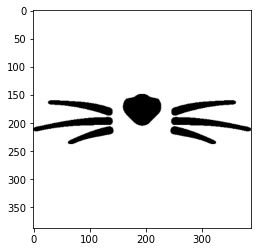

(387, 387, 3)


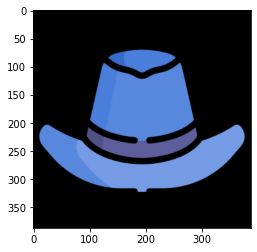

(387, 387, 3)


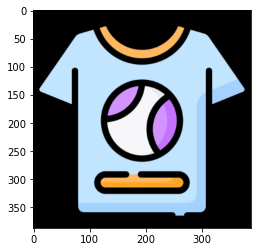

In [9]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_mustache.png'
sticker_path1 = os.getenv('HOME')+'/aiffel/camera_sticker/images/cowboy-hat.png'
sticker_path2 = os.getenv('HOME')+'/aiffel/camera_sticker/images/t-shirt.png'

img_sticker = cv2.imread(sticker_path) # 스티커 이미지(고양이 수염)를 불러온다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)
plt.imshow(img_sticker)
plt.show()

img_sticker1 = cv2.imread(sticker_path1) # 스티커 이미지(카우보이 모자)를 불러온다
img_sticker1 = cv2.resize(img_sticker1, (w1,h1))
print (img_sticker1.shape)
plt.imshow(img_sticker1)
plt.show()

img_sticker2 = cv2.imread(sticker_path2) # 스티커 이미지(카우보이 모자)를 불러온다
img_sticker2 = cv2.resize(img_sticker2, (w2*1,h2*1))
print (img_sticker2.shape)
plt.imshow(img_sticker2)
plt.show()

- 스티커의 이미지를 읽어온 후, 위에서 계산한 크기(w, h)를 이용하여 스티커를 resize

In [10]:
refined_x = x - w // 2   # 고양이 수염 위치
refined_y = y + 10  
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

refined_x1 = x - w // 2   # 카우보이 모자 위치
refined_y1 = y1 - h1 // 2 - 40 
print ('(x,y) : (%d,%d)'%(refined_x1, refined_y1))

refined_x2 = x - w // 2   # 티셔츠 위치
refined_y2 = y2 + h2 + 120
print ('(x,y) : (%d,%d)'%(refined_x2, refined_y2))

(x,y) : (326,415)
(x,y) : (326,93)
(x,y) : (326,833)


In [11]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식
# 원본이미지에 각각의 스티커 이미지 적용

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

sticker_area1 = img_show[refined_y1:refined_y1+img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]]
img_show[refined_y1:refined_y1+img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]] = \
    np.where(img_sticker1==0,sticker_area1,img_sticker1).astype(np.uint8)
print("슝~")

sticker_area2 = img_show[refined_y2:refined_y2+img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]]
img_show[refined_y2:refined_y2+img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]] = \
    np.where(img_sticker2==0,sticker_area2,img_sticker2).astype(np.uint8)
print("슝~")

슝~
슝~
슝~


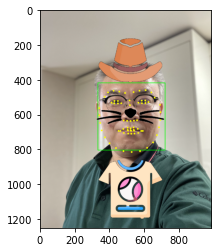

In [12]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## bounding box와 landmark를 제거하고 최종 결과만 출력

- 각각의 스티커와 원본이미지 간의 좀더 자연스러운 이미지를 위해 `cv2.addWeighted()` 적용

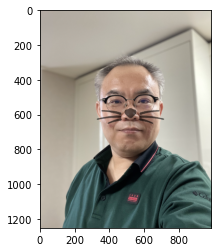

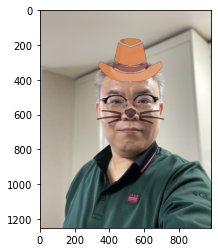

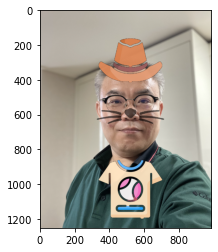

In [13]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.4, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.6, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.addWeighted() 스티커를 조금 더 자연스럽게 적용하기

sticker_area1 = img_bgr[refined_y1:refined_y1 +img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]]
img_bgr[refined_y1:refined_y1 +img_sticker1.shape[0], refined_x1:refined_x1+img_sticker1.shape[1]] = \
    cv2.addWeighted(sticker_area1, 0.05, np.where(img_sticker1==0,sticker_area1,img_sticker1).astype(np.uint8), 0.95, 0)
#     np.where(img_sticker1==0,sticker_area1,img_sticker1).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

sticker_area2 = img_bgr[refined_y2:refined_y2 +img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]]
img_bgr[refined_y2:refined_y2 +img_sticker2.shape[0], refined_x2:refined_x2+img_sticker2.shape[1]] = \
    cv2.addWeighted(sticker_area2, 0.05, np.where(img_sticker2==0,sticker_area2,img_sticker2).astype(np.uint8), 0.95, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## 카메라 스티커앱 첫 시도

- 본인의 사진을 배경으로 고양이 수염 스티커 붙이기를 시도하였다.
- 고양이 수염 스티커 붙이기는 원본에 정상적으로 합성이 잘 되었다. 랜드마크 point 위치와 거의 일치해서 쉽게 붙일수 있었던거 같다.
- 카우보이 모자와 t-shirt 스티커 붙일때는 위치를 잡는 것에 약간의 애를 먹긴 했지만 정확한 위치에 잘 어울리게 출력되었다.
- 원본 사진과 잘 블렌딩이 되도록 `cv2.addWeighted()` 사용도 여러 검색을 통해서 알게되었고 적용도 잘 되어서 기뻤다.
- 기타 다양한 방법은 `camera_sticker2` 파일에서 다루고 있으니 참고 바란다.
